# Debug Challenge - Team Model
## Interactive Activity: Find and Fix the Bug!

**Your Task**: This logistic regression model has a bug that prevents it from training properly. 

**Instructions**:
1. Run all the cells
2. Observe what happens
3. Find the bug
4. Fix it
5. Explain to the class what was wrong

**Hints**: 
- Watch the cost values carefully
- What should happen to cost during training?
- Are there any unusual patterns?

Good luck! 🐛🔍

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## Load Dataset

In [22]:
# Create synthetic binary classification dataset
m_train = 200
m_test = 50
n_features = 50

# Generate data
X_train = np.random.randn(n_features, m_train)
y_train = (np.random.rand(1, m_train) > 0.5).astype(int)

X_test = np.random.randn(n_features, m_test)
y_test = (np.random.rand(1, m_test) > 0.5).astype(int)

print(f"Training set: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"Test set: X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Training set: X_train.shape = (50, 200), y_train.shape = (1, 200)
Test set: X_test.shape = (50, 50), y_test.shape = (1, 50)


## Helper Functions

In [23]:
def sigmoid(z):
    """
    Compute sigmoid activation
    """
    return 1 / (1 + np.exp(-z))

In [24]:
def initialize_parameters(n_features):
    """
    Initialize weights and bias
    """
    w = np.zeros((n_features, 1))
    b = 0.0
    return w, b

In [25]:
def propagate(w, b, X, y):
    """
    Forward and backward propagation
    """
    m = X.shape[1]
    
    # Forward propagation
    epsilon=1e-8  # To prevent log(0)=-inf
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    # Backward propagation
    dw = 1/m * np.dot(X, (A - y).T)
    db = 1/m * np.sum(A - y)
    
    grads = {"dw": dw, "db": db}
    return grads, cost

## Training Function

In [26]:
def train(w, b, X, y, num_iterations, learning_rate, print_cost=True):
    """
    Optimize parameters using gradient descent
    """
    costs = []
    
    for i in range(num_iterations):
        # Get gradients and cost
        grads, cost = propagate(w, b, X, y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record cost
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w, "b": b}
    return params, costs

In [27]:
def predict(w, b, X):
    """
    Predict labels for dataset X
    """
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0
    
    return y_pred

## Run the Model

In [28]:
# Initialize parameters
w, b = initialize_parameters(n_features)

learning_rate = 0.01

num_iterations = 2000

# Train the model
print("Training the model...\n")
params, costs = train(w, b, X_train, y_train, num_iterations, learning_rate)

Training the model...

Cost after iteration 0: 0.6931471805599452
Cost after iteration 100: 0.6511648623516103
Cost after iteration 200: 0.626477998072617
Cost after iteration 300: 0.6109443292806584
Cost after iteration 400: 0.6005726881990524
Cost after iteration 500: 0.5933065341811651
Cost after iteration 600: 0.5880170669988337
Cost after iteration 700: 0.584046285466014
Cost after iteration 800: 0.5809899311437006
Cost after iteration 900: 0.5785883368250404
Cost after iteration 1000: 0.576668355242009
Cost after iteration 1100: 0.5751108278766978
Cost after iteration 1200: 0.57383151081134
Cost after iteration 1300: 0.5727694389589345
Cost after iteration 1400: 0.571879581273083
Cost after iteration 1500: 0.5711280659891584
Cost after iteration 1600: 0.5704889963981136
Cost after iteration 1700: 0.5699422794231641
Cost after iteration 1800: 0.5694721153523914
Cost after iteration 1900: 0.5690659286888916


## Visualize Results

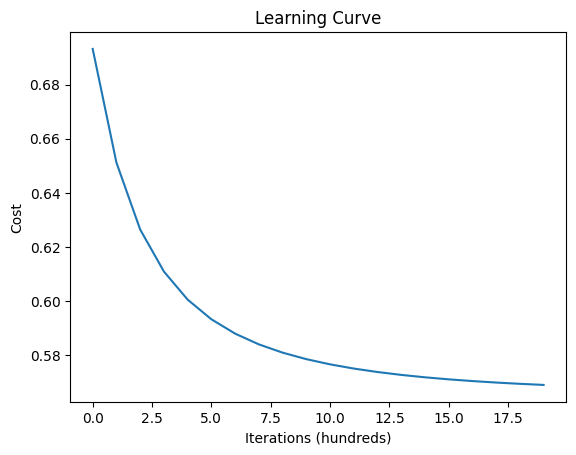

In [29]:
# Plot learning curve
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (hundreds)')
plt.title('Learning Curve')
plt.show()

## Evaluate Performance

In [30]:
# Get predictions
y_pred_train = predict(params["w"], params["b"], X_train)
y_pred_test = predict(params["w"], params["b"], X_test)

# Calculate accuracy
train_accuracy = 100 - np.mean(np.abs(y_pred_train - y_train)) * 100
test_accuracy = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100

print(f"Train Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Train Accuracy: 68.0%
Test Accuracy: 52.0%


---

## 🎯 Challenge Questions

Once you've fixed the bug, answer these:

1. **What was the bug?**
   - The bug was in the cost calculation of the logistic regression model. The error happened because the model tried to compute log(0) which is undefined. This made the cost become NaN and stopped trainig from working properly.

2. **How did you identify it?**
   - The bug was identified by observing the cost values during training. Instead of decreasing smoothly, the cost became NaN, which indicated problem in the loss calculation.

3. **Why did it cause the specific problem?**
   - The issue occurred because logarithmic functions are undefined for 0. When predicted values became 0 or 1, log(0) produced negative infinity, resulting in NaN values which disrupted the gradient descent and prevented proper training.

4. **What learning rate worked best?**
   - The learning rate of 0.01 worked the best because it provided stable convergence of the cost function, whereas larger values cause instability during training.

5. **What accuracy did you achieve?**
   - Train: _68.0_%
   - Test: _52.0_%